In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
from sklearn.datasets import make_blobs

In [39]:
X,y = make_blobs(n_samples=1000 ,centers=3,n_features=2 , random_state=23)

# ye y ka value b deta he pr hm ice ignore kar de gein kio ke ye clustering algo he

In [40]:
X.shape

(1000, 2)

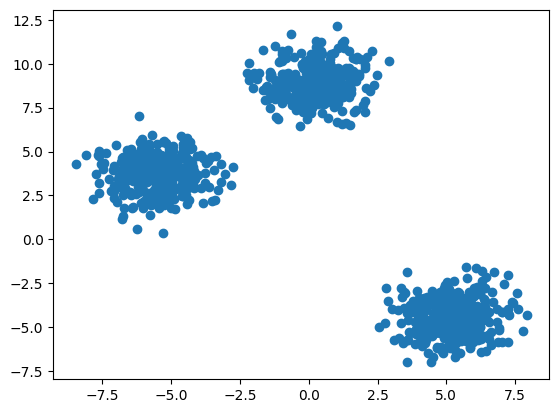

In [6]:
plt.scatter(X[:,0] , X[:,1])

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33 , random_state=42)

In [42]:
## Manual process 
## Elbow method to select the k value

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [43]:
wcss 

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1181.495200296287,
 1049.087281025385,
 900.8939320669808,
 762.626711702077,
 700.673962432752,
 586.710930109992,
 543.7682853583719]

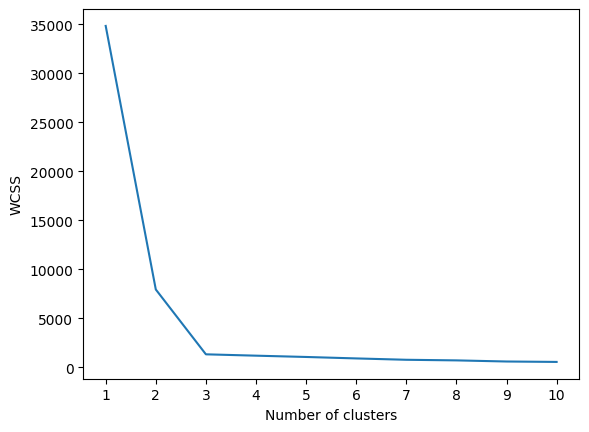

In [44]:
## plot elblow curve
plt.plot(range(1,11) , wcss)  
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
# from manual elbow method we can see that k is 3

In [45]:
kmeans = KMeans(n_clusters=3 , init="k-means++")

In [46]:
y_labels = kmeans.fit_predict(X_train)
y_labels

array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

In [47]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.25819212,  8.89996663],
       [ 5.19869533, -4.43633479],
       [-5.57129803,  3.78294776]])

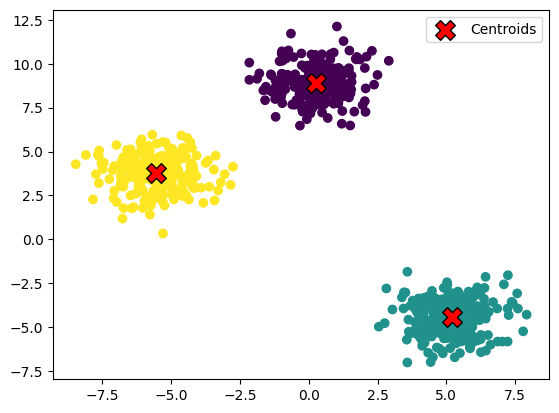

In [48]:
plt.scatter(X_train[:,0] , X_train[:,1]  , c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200, edgecolor='black', label='Centroids')
plt.legend()
plt.show()



In [49]:
#now we chk the test data as well

y_test_labels = kmeans.predict(X_test)
y_test_labels

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0,

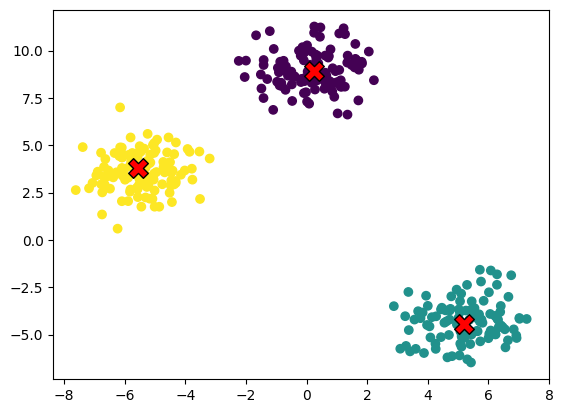

In [50]:
plt.scatter(X_test[:,0] , X_test[:,1] , c=y_test_labels)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200, edgecolor='black', label='Centroids')


In [17]:
# Now the thing is we cant see the manual method if there are so much big data
# if we want to automate that we use knee locator
# pip install kneed

In [18]:
import sys
print(sys.executable)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\python.exe


In [51]:
from kneed import KneeLocator

In [52]:
kl = KneeLocator(range(1,11) , wcss , curve='convex' , direction="decreasing")
kl.elbow

np.int64(3)

In [53]:
## Performance metrices 
## Silhoute score

silhouette_coeff = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train , kmeans.labels_)
    silhouette_coeff.append(score)


In [22]:
silhouette_coeff

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6116745081781619),
 np.float64(0.4851905161855058),
 np.float64(0.5137563998040139),
 np.float64(0.3260233533848177),
 np.float64(0.4766737679304823),
 np.float64(0.3280126912822187),
 np.float64(0.341994592201587)]

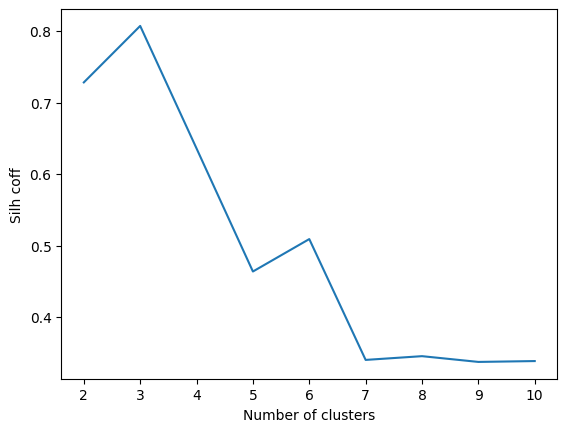

In [54]:
## plot elblow curve
plt.plot(range(2,11) , silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silh coff")
plt.show()

In [24]:
# we can also see from this graph that our score is maxium in case of 3